In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
def get_errors_by_positions(errors_positions: dict, BASE_DIR: str) -> pd.DataFrame:
    '''
    Функция читает файлы обучения, извлекает 
    значения ошибок обучения и валидации.
    Поиск строк, в которых содержится необходимая информация производится
    на основании переданного словаря.
    Также проводится расчет средних и отклонений.
    '''
    errors = {}
    for pot_number in range(1, 5+1):
        path = BASE_DIR + f'1.train_and_validate/train.{pot_number}.report'
        fin = open(path, 'r')
        report_ = fin.readlines()
        errors_ = []
        for name_, position_ in errors_positions.items():
            value_ = float(report_[position_].strip().split()[-1])
            errors_.append(value_)
        errors[f'pot_{pot_number}'] = errors_

    errors = pd.DataFrame.from_dict(errors, orient='index', columns=errors_positions.keys())

    std_errors = errors.describe().loc['std']
    mean_errors = errors.describe().loc['mean']

    errors.loc['mean'] = mean_errors
    errors.loc['std'] = std_errors

    return errors


def get_train_and_validation_errors(BASE_DIR: str) -> pd.DataFrame:
    '''
    BASE_DIR is path prefix. IMPORTANT: add '/' in the end.
    BASE_DIR specifies the exact problem.
    Example: BASE_DIR = 'part_1/'

    Другими словами, BASE_DIR - это префикс конкретной задачи,
    в нашем случае это part_1/, part_2/ и  т.д.

    Функция читает файлы обучения, извлекает 
    значения ошибок обучения и валидации.
    Также проводится расчет средних и отклонений.
    '''
    errors_positions = {
        'train_energy': -74,
        'train_forces': -62,
        'train_stresses_GPa': -46,
        'validation_energy': -33,
        'validation_forces': -21,
        'validation_stresses_GPa': -5,
    }

    errors = get_errors_by_positions(errors_positions, BASE_DIR)
    return errors


def get_train_errors(BASE_DIR: str) -> pd.DataFrame:
    '''
    BASE_DIR is path prefix. IMPORTANT: add '/' in the end.
    BASE_DIR specifies the exact problem.
    Example: BASE_DIR = 'part_1/'

    Функция, аналогичная функции get_train_and_validation_errors, отличающаяся 
    лишь тем, что работает в случае, когда валидация не проводилась.
    '''
    errors_positions = {
        'train_energy': -33,
        'train_forces': -21,
        'train_stresses_GPa': -5,
    }

    errors = get_errors_by_positions(errors_positions, BASE_DIR)
    return errors


def plot_E_V(BASE_DIR: str) -> None:
    fig, ax = plt.subplots(dpi=150)
    for pot_number in range(1, 5+1):
        energy_volume = pd.read_csv(BASE_DIR + f'2.relax_and_compress-extend_and_E_V/E_V.{pot_number}.txt', sep=' ', names=('V', 'E'))
        ax.plot(energy_volume['V'], energy_volume['E'], label=f'pot.{pot_number}')
    ax.set_xlabel('Volume')
    ax.set_ylabel('Energy')
    ax.legend()
    plt.show()

def get_elastic_constants(BASE_DIR: str) -> pd.DataFrame:
    fin = open(BASE_DIR + f'3.ElConstLAMMPS/ElasticConstants.txt', 'r')
    fin_lines = fin.readlines()

    elastic_constants = {}
    for pot_number, line in enumerate(fin_lines):
        elastic_constants[f'pot_{pot_number}'] = tuple(map(float, line.strip().split()))
    elastic_constants = pd.DataFrame.from_dict(elastic_constants, orient='index', columns=('C11', 'C12', 'C44'))
    std_elastic_constants = elastic_constants.describe().loc['std']
    mean_elastic_constants = elastic_constants.describe().loc['mean']

    elastic_constants.loc['mean'] = mean_elastic_constants
    elastic_constants.loc['std'] = std_elastic_constants
    
    return elastic_constants

# Часть 1

Обучены 5 потенциалов 12го уровня на выборке train.cfg.
Ошибки валидации получены для каждого из 5 потенциалов по выборке valid.cfg.

По результатам обучения и валидации рассчитана неопределенность предсказания ошибок обучения и валидации.

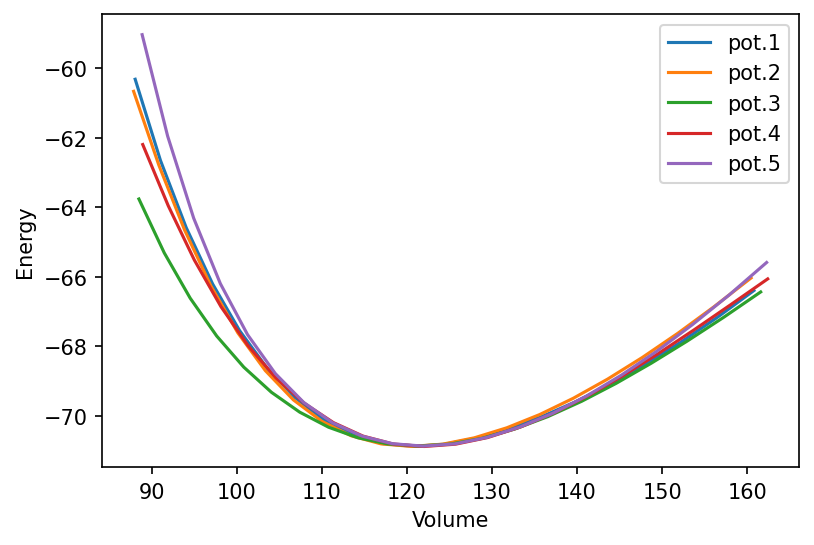

In [3]:
BASE_DIR = 'part_1/'

errors_1 = get_train_and_validation_errors(BASE_DIR)
plot_E_V(BASE_DIR)
el_const_1 = get_elastic_constants(BASE_DIR)

In [4]:
errors_1

,train_energy,train_forces,train_stresses_GPa,validation_energy,validation_forces,validation_stresses_GPa
pot_1,0.053905,0.132863,0.312509,0.082945,0.152626,0.318802
pot_2,0.045950,0.125413,0.296478,0.067755,0.143780,0.293934
pot_3,0.045130,0.120427,0.193766,0.071385,0.142432,0.205195
pot_4,0.053753,0.129330,0.319055,0.078179,0.149253,0.325794
pot_5,0.044182,0.121932,0.257222,0.067080,0.141374,0.256311
mean,0.048584,0.125993,0.275806,0.073469,0.145893,0.280007
std,0.004829,0.005151,0.051771,0.006888,0.004834,0.049884


In [5]:
el_const_1

,C11,C12,C44
pot_0,90.448674,18.985956,53.061663
pot_1,95.460013,35.347483,48.312332
pot_2,97.464931,12.279556,43.246797
pot_3,61.212380,-20.909002,42.822392
pot_4,106.316920,35.776019,57.232263
mean,90.180584,16.296002,48.935089
std,17.179524,23.184100,6.244623


# Часть 2
5 потенциалов 12го уровня обучены на выборке train_full.cfg. По результатам также проведено растяжение-сжатие и построение кривых энергия-объем. Затем рассчитаны константы упругости.

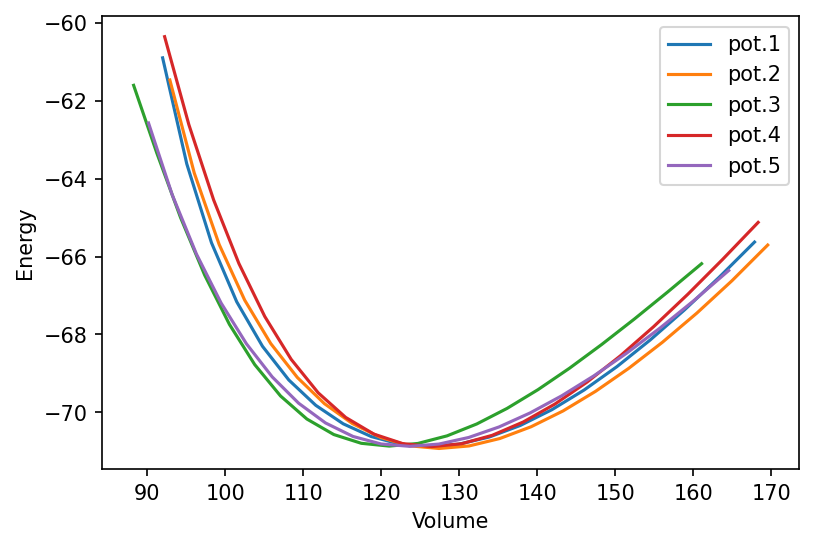

In [6]:
BASE_DIR = 'part_2/'

errors_2 = get_train_errors(BASE_DIR)
plot_E_V(BASE_DIR)
el_const_2 = get_elastic_constants(BASE_DIR)

In [7]:
errors_2

,train_energy,train_forces,train_stresses_GPa
pot_1,0.051837,0.113029,0.262533
pot_2,0.054394,0.115163,0.253929
pot_3,0.055800,0.121499,0.271099
pot_4,0.058127,0.108072,0.235962
pot_5,0.053804,0.108826,0.311145
mean,0.054793,0.113318,0.266934
std,0.002345,0.005434,0.027927


In [8]:
el_const_2

,C11,C12,C44
pot_0,141.428419,24.402299,58.240060
pot_1,214.575080,88.875362,76.201528
pot_2,84.539005,9.968035,64.748689
pot_3,215.674591,118.486374,39.876549
pot_4,59.420222,-13.253162,41.470094
mean,143.127463,45.695781,56.107384
std,72.128781,55.605325,15.497462


# Часть 3

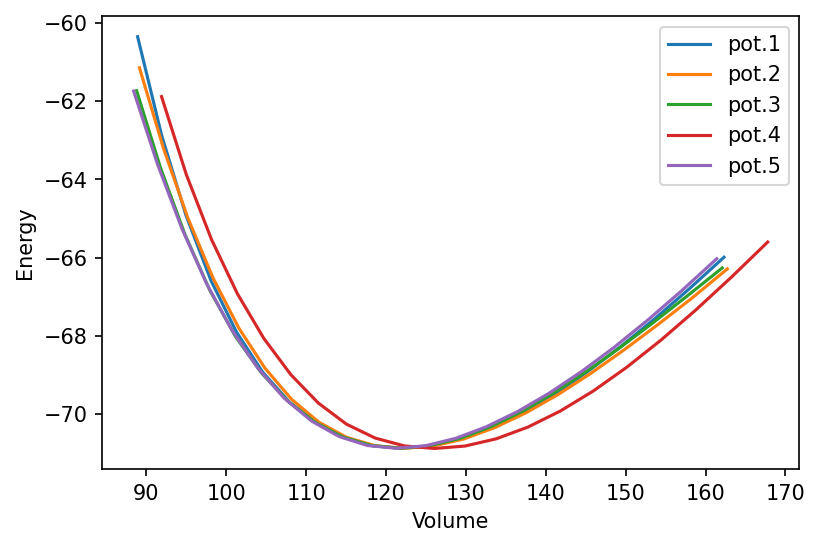

In [9]:
BASE_DIR = 'part_3/'

errors_3 = get_train_errors(BASE_DIR)
plot_E_V(BASE_DIR)
el_const_3 = get_elastic_constants(BASE_DIR)

In [10]:
errors_3

,train_energy,train_forces,train_stresses_GPa
pot_1,0.047507,0.096213,0.192356
pot_2,0.058627,0.098106,0.210552
pot_3,0.052565,0.098124,0.186477
pot_4,0.048892,0.095846,0.204421
pot_5,0.049174,0.097748,0.196662
mean,0.051353,0.097207,0.198094
std,0.004471,0.001093,0.009555


In [11]:
el_const_3

,C11,C12,C44
pot_0,76.713848,0.642834,64.870777
pot_1,71.988011,-4.292851,60.934112
pot_2,87.646009,9.291985,55.287291
pot_3,98.719577,5.909845,34.988949
pot_4,86.312676,10.349159,58.627670
mean,84.276024,4.380194,54.941760
std,10.395946,6.149871,11.686677
